In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfCols = ['target', 'id', 'timestamp', 'queryType', 'user', 'tweet']


df = pd.read_csv('training.1600000.processed.noemoticon.csv', names = dfCols)
df.head()

,target,id,timestamp,queryType,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df["target"] = np.where(df["target"] == 0, "Negative", df["target"])
df["target"] = np.where(df["target"] == 2, "Neutral", df["target"])
df["target"] = np.where(df["target"] == '4', "Positive", df["target"])

In [4]:
df["target"].value_counts()

Positive    800000
Negative    800000
Name: target, dtype: int64

<AxesSubplot:title={'center':'Distribution of data'}, xlabel='target'>

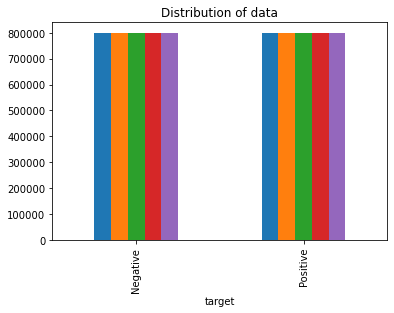

In [5]:
df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [7]:
stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [8]:
df.tweet = df.tweet.apply(lambda x: cleanText(x))

In [9]:
X=df.tweet
y=df.target

In [10]:
from wordcloud import WordCloud

In [23]:
#Examining word distribution in positive tweets
positiveTweetsDF = df[df['target'] == 'Positive']
posTweets = positiveTweetsDF['tweet']
posTweets.head()

800000              I LOVE  Health UandPets u guys r best  
800001     im meeting one besties tonight  Cant wait    ...
800002      DaRealSunisaKim Thanks Twitter add  Sunisa  ...
800003     Being sick really cheap hurts much eat real f...
800004                       LovesBrooklyn  effect everyone
Name: tweet, dtype: object

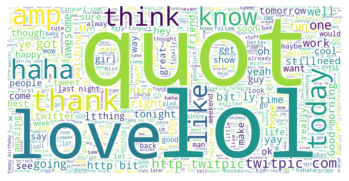

In [29]:
wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800,stopwords=stopWords, background_color="white").generate(' '.join(posTweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
#Examining word distribution in negative tweets
negativeTweetsDF = df[df['target'] == 'Negative']
negTweets = negativeTweetsDF['tweet']
negTweets.head()

0      switchfoot http   twitpic com  y zl   Awww  ...
1     upset can t update Facebook texting it    mig...
2      Kenichan I dived many times ball  Managed sa...
3                     whole body feels itchy like fire
4      nationwideclass no  it s behaving all  i m m...
Name: tweet, dtype: object

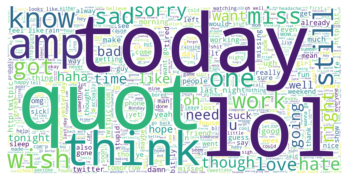

In [28]:
wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords=stopWords, background_color="white").generate(' '.join(negTweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()